In [2]:
from random import randint
import numpy as np
import statsmodels.api as sm
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("covid19_whole.csv",header=0, index_col=0)

In [0]:
af = df.iloc[:,1:]

In [20]:
af.head()

,Confirmed,Recovered,Deaths,AR-1,AR-2,AR-3,AR-4,AR-5,MA-1,MA-2,MA-3,MA-4,MA-5
1,0.335388,0.134921,0.285714,0.000404,0.006555,-0.015658,-0.005842,-0.000897,0.003178,0.009401,-0.013089,-0.002800,0.001949
2,0.205611,0.552448,0.245614,0.004350,0.000404,0.006555,-0.015658,-0.005842,0.007124,0.003250,0.009125,-0.012616,-0.002996
3,1.002720,1.806306,0.215962,-0.020909,0.004350,0.000404,0.006555,-0.015658,-0.018135,0.007196,0.002974,0.009597,-0.012812
4,0.201750,0.367576,0.397683,0.005089,-0.020909,0.004350,0.000404,0.006555,0.007862,-0.018062,0.006920,0.003446,0.009401
5,0.156663,0.319249,0.176796,0.014360,0.005089,-0.020909,0.004350,0.000404,0.017134,0.007935,-0.018339,0.007392,0.003250


In [0]:
# calucluate the fitness
def calculate_fitness(pop_array):
    size = 50
    error = 0
    fitness = []
    for i in range(size): # 50 is the size of population
        index = [0]
        error = 0
        for j in range(13): # 14 is the size of gene length
            if(pop_array[i][j] == 1):
              index.append(j)
       # print((index))
        for i in range(20):
            a = af.iloc[i:(34+i),index] 
            b = df['Return'][i:(34+i)]

            model = sm.OLS(b, a).fit()
            AIC = model.aic
         # print(AIC)  
            error = error + AIC #abs(model_prediction[0] - df['Return'][35+i])*100
        fitness.append(error) 
    return np.array(fitness)

#fitness_arr = calculate_fitness(pop_array)
#fitness_arr  

In [0]:
''' selection: how to select?
 we will use the proptional selection'''

def select(prop_fitness):
   index_best = np.where(prop_fitness == prop_fitness.min())
   # we will get the last 20% out of the population
   index_least = np.where(prop_fitness > np.quantile(prop_fitness, 0.8))
   return index_best[0][0], index_least[0]

#a, b = select(fitness_arr)
#pop_array[b] = pop_array[a]

In [0]:

# ok, so this part can be improved.

def getFittest(pop):
  return calculate_fitness(pop).min()

def getLeastFittest(pop):
  return calculate_fitness(pop).max()

def getAverageFittest(pop):
  return calculate_fitness(pop).mean()

def getFit(pop):
  result = calculate_fitness(pop)
  return result.min(), result.max(), result.mean()

#best, worest, average = getFit(pop_array)
# print(best)
# print(worest)
# print(average)

In [0]:
''' recombination operator 
    (one-point crossover)'''

def recombination(individual1, individual2):
    crossOverPoint = randint(0,12)
    for i in range(crossOverPoint):
        temp = individual1[i]
        individual1[i] = individual2[i]
        individual2[i] = temp
    return individual1, individual2

# size = 50
# for i in range(size):
#     rand_index = randint(0,4)
#     print(rand_index)
#     print(pop_array[rand_index])
#     pop_array[rand_index], pop_array[i] = recombination(pop_array[i], pop_array[rand_index])

In [0]:
''' mutation operator'''
def mutate(individual1):
    mutationPoint = randint(0, 12)
    if (individual1[mutationPoint] == 0):
        individual1[mutationPoint] = 1
    else:
        individual1[mutationPoint] = 0
# size = 50
# for i in range(size):
#     if (randint(0,7)%7 < 5): # mutate under some probability
#         mutate(pop_array[i])

In [0]:

#-------step 1, create the genes with the population---------

pop = []
size = 50
for j in range(size):
    genes = []
    for i in range(13): # totally there is 13 varables
        genes.append(randint(0,1))
    pop.append(genes)

pop_array = np.array(pop) # now pop_array is an np array not a list anymore

generation = 0
best_fit_arr = []
least_fit_arr = []
average_pop_arr = []
# ---------- I do not need this one first. ----------
#whole_pop_fitness = []

In [0]:
while True:
   print("generation:")
   print(generation)
   generation = generation + 1

## change here a little bit.

   best_fit, least_fit, average_pop = getFit(pop_array)
  
   best_fit_arr.append(best_fit)
   least_fit_arr.append(least_fit)
   average_pop_arr.append(average_pop)

   ''' recombination step '''
   ''' is the recombination too much? '''

  #  for i in range(size):
  #     rand_index = randint(0,size -1)
  #     pop_array[rand_index], pop_array[i] = recombination(pop_array[i], pop_array[rand_index])
  #  print("after recombination:")
  #  print(sum(sum(pop_array)))

   '''mutation step '''
   for i in range(size):
      if (randint(0,7)%7 < 5): # mutate under some probability
         mutate(pop_array[i])
   print("after mutation:")
   print(sum(sum(pop_array)))

   '''selection step '''
   a, b = select(calculate_fitness(pop_array))
   pop_array[b] = pop_array[a]
   print("after selection:")
   print(sum(sum(pop_array)))

  
   #print(getFittest(pop_array))

   if (generation >100): break

sum(calculate_fitness(pop_array))

In [0]:
# find out the best one
a, b = select(calculate_fitness(pop_array))

In [34]:
a

1

In [35]:
pop_array[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

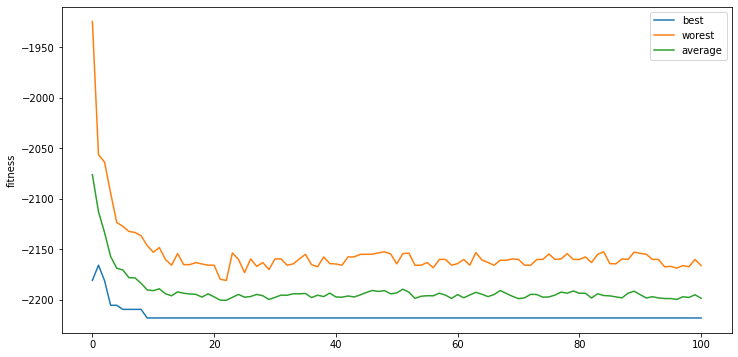

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(best_fit_arr, label='best')
plt.plot(least_fit_arr, label='worest')
plt.plot(average_pop_arr, label='average')
plt.ylabel('fitness')
plt.legend()
plt.show()

In [50]:
pop_array[1]


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [0]:
index = [0, 8]

In [55]:
af.iloc[1:2,index]

,Confirmed,MA-1
2,0.205611,0.007124


In [0]:
# by our model
error_term = []
forecast = 0
for i in range(20):
    # get the data 
    a = af.iloc[i:(34+i),index]
    b = df['Return'][i:(34+i)]

    # fit the model
    model = sm.OLS(b, a).fit()

    # get the forcast
    confirmed = af.iloc[35+i,0]
    ma1 = af.iloc[35+i,8]
    forecast = model.params[0]*confirmed + model.params[1]*ma1

    #RMSE
    error = (forecast - df['Return'][35+i])**2
    error_term.append(error)

In [67]:
sum(error_term)

0.08131773770636472

In [0]:
# by ARIMA(1,1)
index = [3,8]
error_term = []
forecast = 0
for i in range(20):
    # get the data 
    a = af.iloc[i:(34+i),index]
    b = df['Return'][i:(34+i)]

    # fit the model
    model = sm.OLS(b, a).fit()

    # get the forcast
    ar1 = af.iloc[35+i,3]
    ma1 = af.iloc[35+i,8]
    forecast = model.params[0]*ar1 + model.params[1]*ma1

    #RMSE
    error = (forecast - df['Return'][35+i])**2
    error_term.append(error)

In [71]:
sum(error_term)

0.090379877193564

In [0]:
# by ARIMA(1,1) Confirmed	Recovered	Deaths
index = [0,1,2,3,8]
error_term = []
forecast = 0
for i in range(20):
    # get the data 
    a = af.iloc[i:(34+i),index]
    b = df['Return'][i:(34+i)]

    # fit the model
    model = sm.OLS(b, a).fit()

    # get the forcast
    confirmed = af.iloc[35+i,0]
    recovered = af.iloc[35+i,1]
    deaths = af.iloc[35+i,2]
    ar1 = af.iloc[35+i,3]
    ma1 = af.iloc[35+i,8]
    forecast = model.params[0]*confirmed + model.params[1]*recovered + model.params[2]*deaths + model.params[3]*ar1 + model.params[4]*ma1

    #RMSE
    error = (forecast - df['Return'][35+i])**2
    error_term.append(error)

In [75]:
sum(error_term)

0.09671040383639681